<a href="https://colab.research.google.com/github/taylan-sen/CIS355_FALL05/blob/main/facedetection_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ☺☻ Face Detection ☻☺
### → with Haar-like features and cascade classifiers!

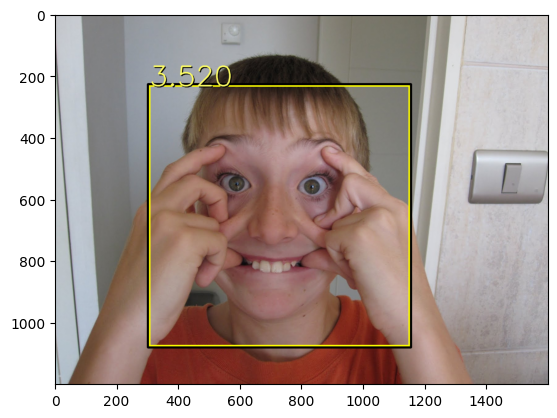

With this notebook we will learn about:
* The Haar wavelet and Haar-like features
* Ensemble Methods
* Cascade Classifiers
* The Viola-Jones face detection technique
* the python urllib module

### Motivation

Earlier we used the ***Fourier Transform*** to analyze the diferent frequency content of signals and images (recall the graphic equalizer for music).  A limitation of Fourier analysis is that it can't model sharp discontinuities well (i.e. edges).  

In summary, the Fourier Transform "rewrites" a sund clip or image as a sum of a series of Sine and Cosine functions of multiples of a base frequency, each having the specific strength (amplitude), in order to best recreate the original signal.  The Sine wave and Cosine wave are not ***localized***, in other words, they don't occur at a specific time, rather they are assumed to exist for all time.  This results in difficulty in modeling edges and leads to weird behavior at the endges of a sound clip being analyzed.  

Wavelets uses a similar concept of decomposing a sound clip or image into a sum of subsignals, but the basis function is not a series of sines and cosines of increasing frequency. Instead, wavelets finds a series of scaled mini-basis functions of varying amplitude and stretch. Unlike a sine or cosine that goes on forever, a wavelet basis function is time limited.  

The simplest wavelet basis function is the Haar wavelet.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaYXf-fO4J1H7ejRrq894cLIjAj0skxuBAFA&s)


For more info on wavelets, see [video](https://www.youtube.com/watch?v=cQ5cCKtOBGY).



QUESTIONS

What is a wavelet?

Why do we use wavelets?

What is OpenCV's CascadeClassifier?  

What about its member function detectMultiScale?





In [1]:
# Download the Haar frontal face model.
!wget https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_default.xml


--2025-10-27 13:40:11--  https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2025-10-27 13:40:12 (31.2 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [2]:
!wget https://i.pinimg.com/originals/17/ce/98/17ce9857598f61a9b3e8e1cc7fa6f921.jpg -O pigfaces.jpg

--2025-10-27 13:40:27--  https://i.pinimg.com/originals/17/ce/98/17ce9857598f61a9b3e8e1cc7fa6f921.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.0.84, 151.101.64.84, 151.101.128.84, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.0.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56697 (55K) [image/jpeg]
Saving to: ‘pigfaces.jpg’

pigfaces.jpg        100%[===================>]  55.37K  --.-KB/s    in 0.008s  

2025-10-27 13:40:27 (7.00 MB/s) - ‘pigfaces.jpg’ saved [56697/56697]



In [3]:
!wget https://c8.alamy.com/comp/DY3YN6/several-kids-making-funny-faces-DY3YN6.jpg
!mv several-kids-making-funny-faces-DY3YN6.jpg kids.jpg

--2025-10-27 13:40:32--  https://c8.alamy.com/comp/DY3YN6/several-kids-making-funny-faces-DY3YN6.jpg
Resolving c8.alamy.com (c8.alamy.com)... 18.238.238.52, 18.238.238.81, 18.238.238.47, ...
Connecting to c8.alamy.com (c8.alamy.com)|18.238.238.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘several-kids-making-funny-faces-DY3YN6.jpg’

several-kids-making     [ <=>                ] 171.58K  --.-KB/s    in 0.01s   

Last-modified header invalid -- time-stamp ignored.
2025-10-27 13:40:33 (11.3 MB/s) - ‘several-kids-making-funny-faces-DY3YN6.jpg’ saved [175701]



In [4]:
!wget https://i0.wp.com/sefiks.com/wp-content/uploads/2018/09/katy-perry-facenet.jpg
!mv 'katy-perry-facenet.jpg' test.jpg

--2025-10-27 13:40:38--  https://i0.wp.com/sefiks.com/wp-content/uploads/2018/09/katy-perry-facenet.jpg
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 367960 (359K) [image/jpeg]
Saving to: ‘katy-perry-facenet.jpg’

katy-perry-facenet. 100%[===================>] 359.34K  --.-KB/s    in 0.1s    

2025-10-27 13:40:39 (3.17 MB/s) - ‘katy-perry-facenet.jpg’ saved [367960/367960]



faces: [[184  53 299 299]
 [ 25 195 194 194]
 [502 421  70  70]
 [118 489  64  64]]


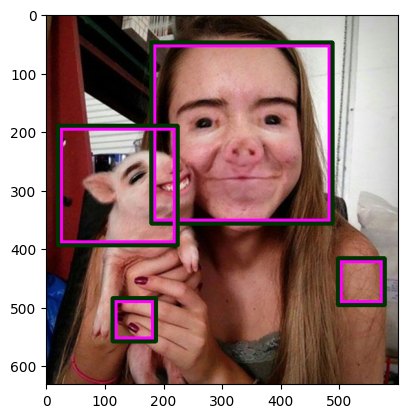

In [5]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Read the input image
#img = cv2.imread('test.jpg')
img = cv2.imread('kids.jpg')
img = cv2.imread('pigfaces.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
print('faces:', faces)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 5)
    cv2.rectangle(img, (x-5, y-5), (x+w+5, y+h+5), (0, 50, 0), 5)
# Display the output
#print('img:', img.shape)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

In [ ]:
import urllib.request
urllib.request.urlretrieve('https://i.pinimg.com/originals/17/ce/98/17ce9857598f61a9b3e8e1cc7fa6f921.jpg', 'file.jpg')

('file.jpg', <http.client.HTTPMessage at 0x7e1596f736a0>)

faces: [[306 232 844 844]]
weights: 3.5195580380386673


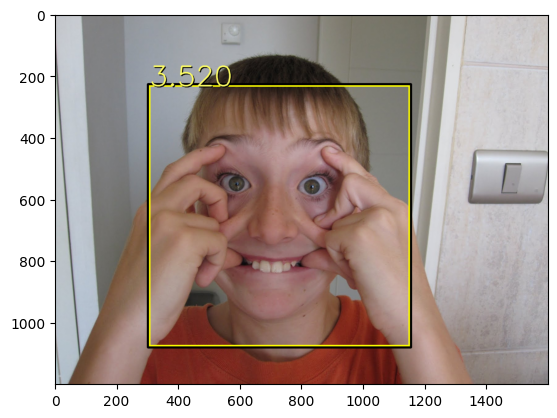

faces: [[1022  219  428  428]
 [ 569  223  468  468]
 [1441  460  108  108]]
weights: 7.451509083795827
weights: 6.532715164299589
weights: 3.8323911147890612


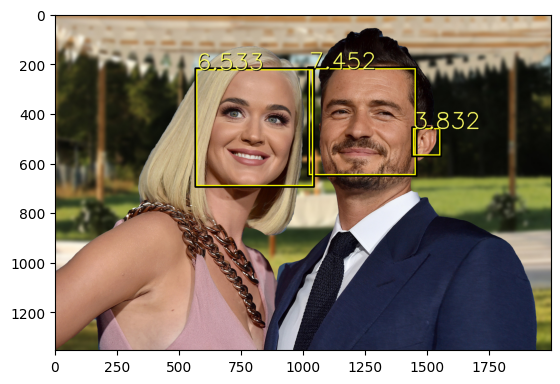

faces: [[ 692   69  126  126]
 [ 582  188  277  277]
 [ 167  265  161  161]
 [1022  284  152  152]
 [ 909  524   64   64]]
weights: 0.8571960718254559
weights: 7.849606046394911
weights: 6.024866939696949
weights: 8.322705065074842
weights: 6.227104033052456


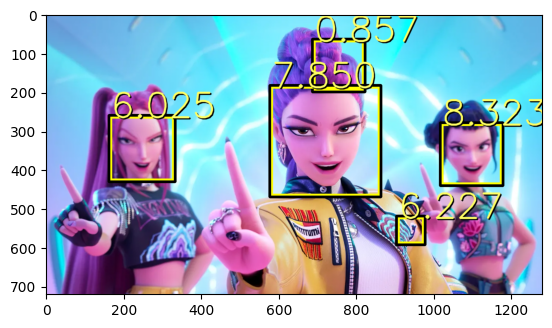

In [9]:
import urllib.request

def find_faces(img_url):
  urllib.request.urlretrieve(img_url, 'file.jpg')
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  # Read the input image
  img = cv2.imread('file.jpg')
  # Convert into grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plt.imshow(gray)
  # Detect faces
  faces, reject_levels, weights = face_cascade.detectMultiScale3(gray, 1.1, 4, outputRejectLevels=True)
  print('faces:', faces)
  # Draw rectangle around the faces
  for (x, y, w, h), weight in zip(faces, weights):
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 255), 5)
    cv2.rectangle(img, (x-5, y-5), (x+w+5, y+h+5), (0, 0, 0), 5)
    #cv2.putText(img, weight, (x,y)), font,
    #               fontScale, color, thickness, cv2.LINE_AA)
    cv2.putText(img, f"{weight:.3f}", (x+3,y+3), cv2.FONT_HERSHEY_SIMPLEX,3,
              (0,0,0), 3, cv2.LINE_AA)
    cv2.putText(img, f"{weight:.3f}", (x,y), cv2.FONT_HERSHEY_SIMPLEX,3,
              (100,255,255), 3, cv2.LINE_AA)
    print('weights:', weight)
  # Display the output
  #print('img:', img.shape)
  img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img2)
  plt.show()
#find_faces('https://cdn.acidcow.com/pics/20091117/hdr_faces_32.jpg')
find_faces('http://2.bp.blogspot.com/_pShGhsG9wW4/TR-NupniIzI/AAAAAAAADpk/PYnc8fvmS-U/s1600/IMG_4607.JPG')
find_faces('https://pagesix.com/wp-content/uploads/sites/3/2020/03/katy-perry-orlando-bloom.jpg')
#find_faces('https://news.niagara.edu/assets/news/_resampled/ScaleWidthWyIxMjAwIl0/svdp.jpg')
find_faces('https://ychef.files.bbci.co.uk/1280x720/p0lq9155.webp')